In [1]:
# !pip install numpy matplotlib scikit-learn

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
import pandas as pd
from PIL import Image
import plotly.express as px
import plotly.graph_objects as go

import plotly.io as pio
pio.renderers.default = 'notebook'


In [3]:
from keras.preprocessing.image import load_img
import warnings
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split

def load_data_food():
    # Chemin vers le répertoire contenant les dossiers d'images par classe
    dossier_images = '../../data/food-101-resize-selected/'
    
    
    size = 32

    # Listes pour stocker les images et les labels
    images = []
    labels = []
    label_to_classname = {}

    # Parcourir tous les dossiers dans le répertoire
    for label, class_folder in enumerate(sorted(os.listdir(dossier_images))):
        class_folder_path = os.path.join(dossier_images, class_folder)

        if os.path.isdir(class_folder_path):
            label_to_classname[label] = class_folder
            # Parcourir tous les fichiers dans le dossier de la classe
            for filename in os.listdir(class_folder_path):
                file_path = os.path.join(class_folder_path, filename)
                if os.path.isfile(file_path):
                    try:
                        # Charger l'image avec PIL
                        with Image.open(file_path) as img:
                            # Redimensionner l'image si nécessaire
                            img = img.resize((size, size))

                            # Convertir l'image en tableau numpy
                            img_array = np.array(img)

                            # Ajouter l'image et son label à la liste
                            images.append(img_array)
                            labels.append(label)

                    except Exception as e:
                        print(f'Erreur lors du traitement de {filename} : {e}')

    images = np.array(images)
    labels = np.array(labels)
    
        # No train/test split
    X_train = images
    y_train = labels
    X_test = None
    y_test = None

    return X_train, X_test, y_train, y_test, label_to_classname




2024-06-28 12:33:51.605631: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-28 12:33:51.633131: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-28 12:33:52.121347: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [4]:
X_train, X_test, y_train, y_test, label_to_classname = load_data_food()
X_train.shape, y_train.shape

((10000, 32, 32, 3), (10000,))

In [5]:
!pwd

/home/duincan/Projects/School/unsupervised/Unsupervised/src/PCA


(10000, 32, 32, 3) (10000,)


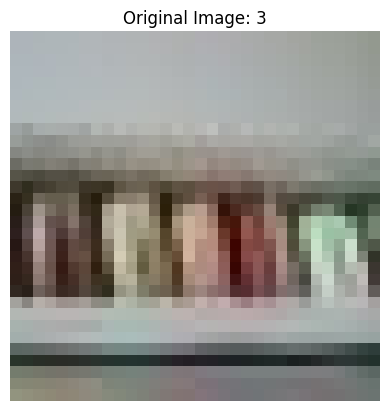

In [29]:
# Function to visualize image
def visualize_image(loc, X, y, title="Image"):
    image_array = X[loc].reshape(32, 32, 3)
    plt.imshow(image_array.astype(np.uint8))
    plt.title(f"{title}: {y[loc]}")
    plt.axis('off')
    plt.show()

def denormalize_and_clip(X):
    X = np.clip(X, 0, 255)
    return X

X_train, X_test, y_train, y_test, label_to_classname = load_data_food()
print(X_train.shape, y_train.shape)

visualize_image(3000, X_train, y_train, title="Original Image")

In [7]:
X = X_train
y = y_train

In [8]:
# # Normalization of data (mean removal and scaling to unit variance from scratch)
# X = X.astype(np.float64)  # Ensure data is in float format for precise calculations
# mean_vector = X.mean(axis=0)  # Calculate the mean of each feature
# X_centered = X - mean_vector  # Subtract the mean to center the data
# std_vector = X_centered.std(axis=0, ddof=1)  # Calculate the standard deviation of each feature
# X_std = X_centered / std_vector  # Divide by std to scale the data to unit variance
# X_std

In [9]:
# Flatten the images for scaling
X_flatten = X_train.reshape(X_train.shape[0], -1)

# Standardize the data
scaler = StandardScaler()
X_std_flatten = scaler.fit_transform(X_flatten)

# Reshape the scaled data back to the original image shape
X_std = X_std_flatten.reshape(X_train.shape)

X_std

array([[[[-1.05263868e+00, -8.40437127e-01, -6.21448070e-01],
         [-1.42124303e+00, -1.25916803e+00, -1.00123852e+00],
         [-1.45055684e+00, -1.26411146e+00, -1.00078576e+00],
         ...,
         [-1.02209516e+00, -8.76231704e-01, -9.51457366e-01],
         [-9.90668943e-01, -8.41171963e-01, -9.30559695e-01],
         [-1.01107697e+00, -8.71557869e-01, -9.61533338e-01]],

        [[-1.05840511e+00, -8.38046425e-01, -6.40896020e-01],
         [-1.25358101e+00, -1.01211563e+00, -7.89519199e-01],
         [-1.35903908e+00, -1.08535889e+00, -8.09250099e-01],
         ...,
         [-1.02673396e+00, -8.71485637e-01, -9.42340606e-01],
         [-9.93544093e-01, -8.25058116e-01, -9.46291999e-01],
         [-1.05844764e+00, -9.02982210e-01, -1.01962242e+00]],

        [[-1.04621230e+00, -8.07084293e-01, -6.30494259e-01],
         [-1.07298463e+00, -8.19244543e-01, -6.15429854e-01],
         [-1.32470620e+00, -1.04099157e+00, -7.83084749e-01],
         ...,
         [-1.24662465e+0

In [10]:
# # Calculation of the covariance matrix from scratch
# # X_std is already centered and scaled
# n_samples = X_std.shape[0]
# cov_matrix = np.dot(X_std.T, X_std) / (n_samples - 1)  # Covariance matrix computation
# cov_matrix[400]

In [11]:
# PCA calculation
cov_matrix = np.cov(X_std_flatten, rowvar=False)

In [12]:
# Calcul des valeurs propres et des vecteurs propres
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)


In [13]:
# Tri des vecteurs propres par ordre décroissant des valeurs propres

sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvectors = eigenvectors[:, sorted_indices]

# Visualisation dimensionnelle

## PCA 2D

In [14]:
# Sélectionner les deux premiers vecteurs propres pour la visualisation
k = 2
projection_matrix = eigenvectors[:, :k]

In [15]:
# Projection des données dans le nouvel espace
X_pca = np.dot(X_std_flatten, projection_matrix)

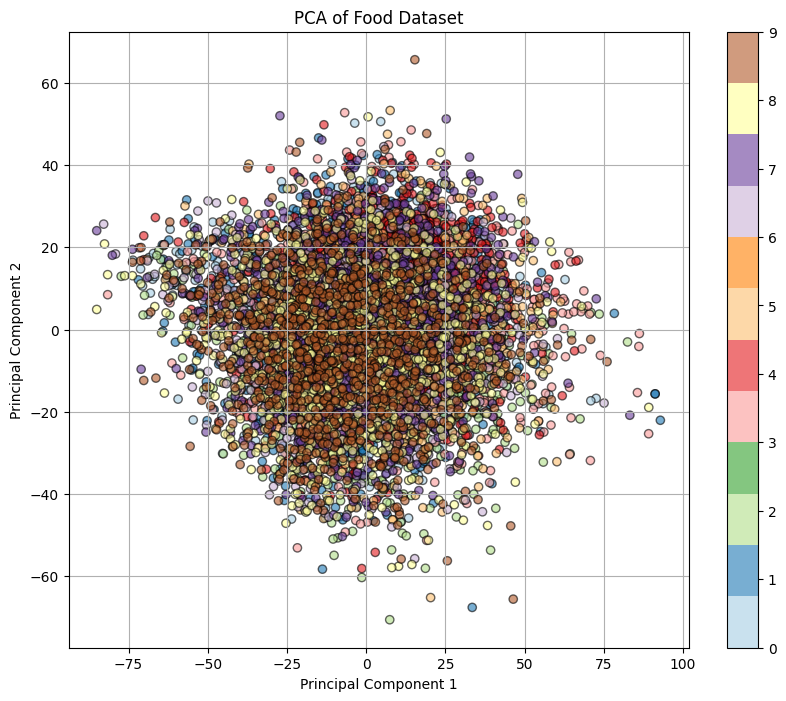

In [16]:
# Visualisation des données réduites
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='Paired', alpha=0.6, edgecolor='k')
plt.colorbar(scatter)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Food Dataset')
plt.grid(True)
plt.show()


## PCA 3D

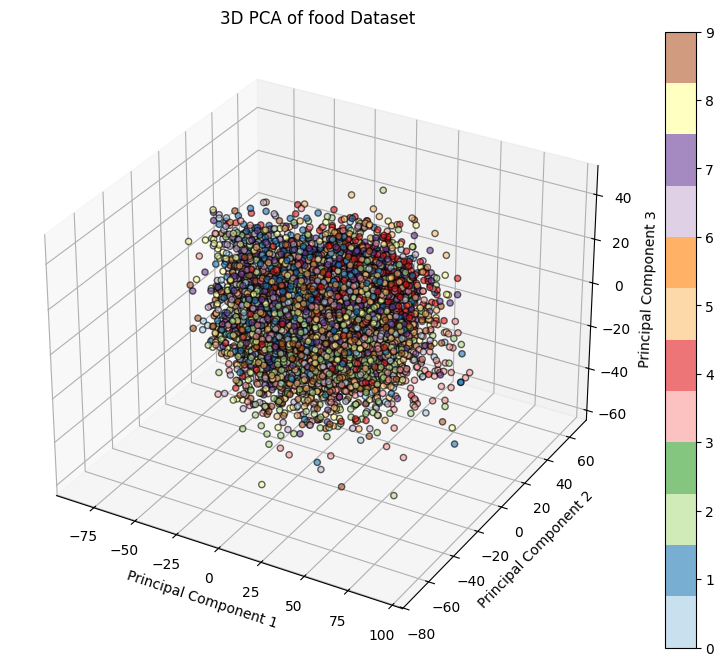

In [32]:


k = 3
projection_matrix3d = eigenvectors[:, :k]

# Project the data onto the top three eigenvectors
X_pca3d = np.dot(X_std_flatten, projection_matrix3d)

# 3D Visualization of the PCA-reduced data
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca3d[:, 0], X_pca3d[:, 1], X_pca3d[:, 2], c=y_train, cmap='Paired', alpha=0.6, edgecolor='k')
plt.colorbar(scatter)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA of food Dataset')
plt.show()

In [18]:
# Function to plot 3D PCA using plotly
def plot_3d_pca(X_pca3d, y):
    fig = px.scatter_3d(
        x=X_pca3d[:, 0],
        y=X_pca3d[:, 1],
        z=X_pca3d[:, 2],
        color=y,
        labels={'x': 'Principal Component 1', 'y': 'Principal Component 2', 'z': 'Principal Component 3'},
        title='3D PCA of Food-101 Dataset',
        opacity=0.6
    )
    fig.update_traces(marker=dict(size=5, line=dict(width=2, color='DarkSlateGrey')),
                      selector=dict(mode='markers'))
    fig.show(renderer='browser')

# Usage
k = 3
projection_matrix3d = eigenvectors[:, :k]

# Project the data onto the top three eigenvectors
X_pca3d = np.dot(X_std_flatten, projection_matrix3d)

# Interactive 3D visualization using plotly
plot_3d_pca(X_pca3d, y_train)

# Compression et reconstruction

In [19]:
def pca_n_components(n, X_std):
    
    projection_matrix = eigenvectors[:, :n]
    X_pca = np.dot(X_std, projection_matrix)
    X_pca_reconstructed = np.dot(X_pca, projection_matrix.T)
    return X_pca, X_pca_reconstructed



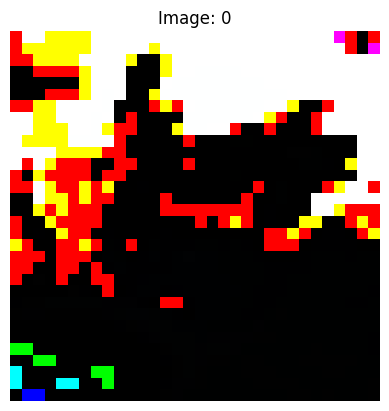

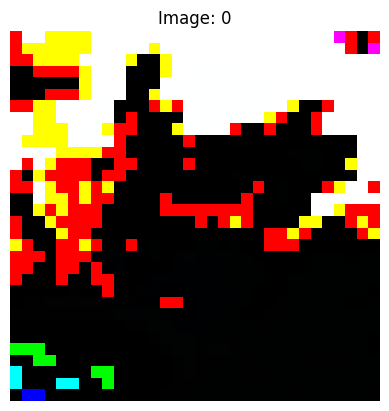

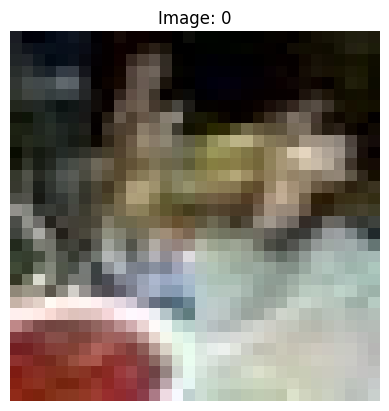

In [20]:
X_pca, X_pca_reconstructed = pca_n_components(3000, X_std_flatten)

visualize_image(0, X_std, y_train)
visualize_image(0, X_pca_reconstructed.reshape(X_train.shape), y_train)

# Denormalize and visualize
X_pca_reconstructed = scaler.inverse_transform(X_pca_reconstructed)
visualize_image(0, X_pca_reconstructed.reshape(X_train.shape), y_train)

def denormalize_and_clip(X):
    X = np.clip(X, 0, 255)
    return X


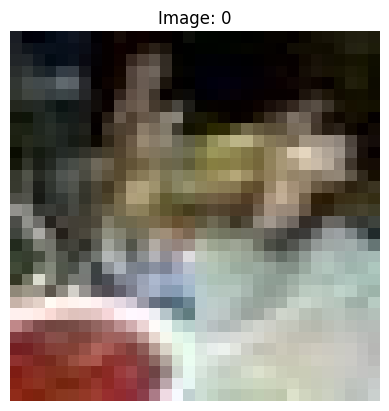

In [21]:
visualize_image(0, X, y_train)


In [22]:
type(X_pca)
print(X_pca.shape[1])

3000


# Gen Data with PCA

In [23]:
def GenDataWithPCA(n, X_std, number_samples = 1,):
    
    k = n
    projection_matrix = eigenvectors[:, :k]
    X_pca = np.dot(X_std, projection_matrix)
    
    
    
    new_vec = np.zeros((number_samples, n))
    
    for j in range(number_samples):
        for i in range(X_pca.shape[1]):
            new_val = np.random.uniform(min(X_pca[:, i]), max(X_pca[:, i]))
            new_vec[j, i] = new_val
            
    X_pca_reconstructed = np.dot(new_vec, projection_matrix.T)
    
    return new_vec, X_pca_reconstructed
    
    

[[ 2.51113196e-01 -5.06287628e+01 -3.37946783e+01  2.29369292e+01
   2.01712103e+00 -1.02482025e+01 -3.16733515e+00  1.02950342e+01
  -2.16415640e+01  1.31185530e+01  1.99941803e+01  2.49039241e+01
   1.16459069e+01  5.09977024e+00  6.28002476e-01  1.48466548e+01
   1.29920218e+01 -1.36260874e+00  1.45351462e+01  2.17145682e+00]
 [ 3.50907015e+01  1.37158116e+00 -3.10739038e+01 -7.02118605e+00
   5.63898562e+01 -2.59317458e+01 -2.50821015e+00  2.34109553e+01
  -3.46757563e+01  1.23489264e+01  2.27474212e+01 -2.25440623e+01
  -2.40191044e+01 -1.09499286e+01  1.35013779e+01 -1.53313116e+01
   2.66786821e+01  1.34094349e+01 -2.60080629e+01 -1.32791801e+00]
 [-8.04557952e+01 -1.71915609e+01 -2.36227732e-01 -3.92102864e+01
  -1.55955092e+01  4.07138559e+01 -2.91044233e+01  4.71507495e+01
  -3.94074377e+01  2.25699866e+01 -4.30680804e+00  8.30517061e-01
   1.85254145e+01  2.58416055e+01 -1.74037903e+01 -6.30453263e+00
  -2.31760553e+01  2.40679075e+01  1.80201413e+01  1.92674037e+01]
 [ 6.55

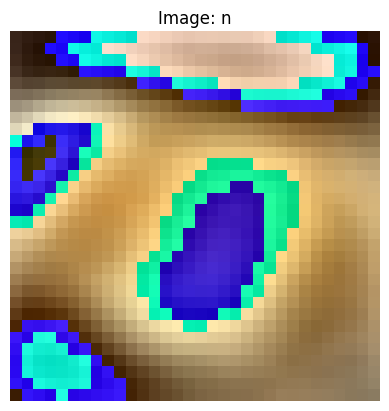

In [24]:
new_vec, X_pca_reconstructed = GenDataWithPCA(20, X_std_flatten, 16)

print(new_vec)
# print(X_pca_reconstructed)

X_pca_reconstructed = scaler.inverse_transform(X_pca_reconstructed)


visualize_image(0, X_pca_reconstructed, 'none')

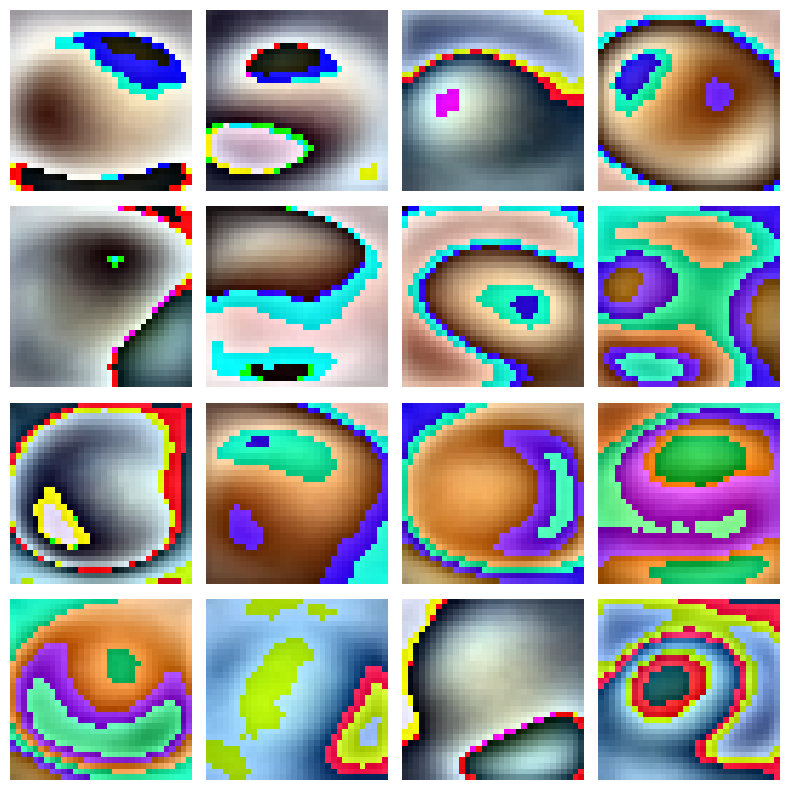

In [34]:
# Modify GenDataWithPCA to generate multiple samples
def GenDataWithPCAmult(n, X_std, number_samples=1):
    k = n
    projection_matrix = eigenvectors[:, :k]
    
    X_pca = np.dot(X_std, projection_matrix)
    
    # Initialize a matrix to store all new PCA vectors
    new_vec = np.zeros((number_samples, k))
    
    for j in range(number_samples):
        for i in range(k):
            # Generate values within the range observed in the original PCA-transformed data
            new_val = np.random.uniform(min(X_pca[:, i]), max(X_pca[:, i]))
            new_vec[j, i] = new_val
            
    # Project back to the original space to get the reconstructed samples
    X_pca_reconstructed = np.dot(new_vec, projection_matrix.T)
    
    return new_vec, X_pca_reconstructed

# Modify visualize_image to handle an array of images
def visualize_images(images, labels=None, title="Image", cmap='gray'):
    # Determine how many images and set up subplot dimensions
    num_images = images.shape[0]
    cols = int(np.ceil(np.sqrt(num_images)))
    rows = int(np.ceil(num_images / cols))
    
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 2, rows * 2))
    axes = axes.ravel()
    
    for i in range(num_images):
        image_matrix = images[i].reshape(32, 32, 3)
        ax = axes[i]
        ax.imshow(image_matrix.astype(np.uint8), cmap=cmap)
        if labels is not None:
            ax.set_title(f"{title}: {labels[i]}")
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()

# Example usage: Generate and visualize multiple PCA-reconstructed images
new_vec, X_pca_reconstructed = GenDataWithPCAmult(10, X_std_flatten, 16)
X_pca_reconstructed = scaler.inverse_transform(X_pca_reconstructed)


visualize_images(X_pca_reconstructed.reshape((16, 32, 32, 3)))


# Gen around clusters

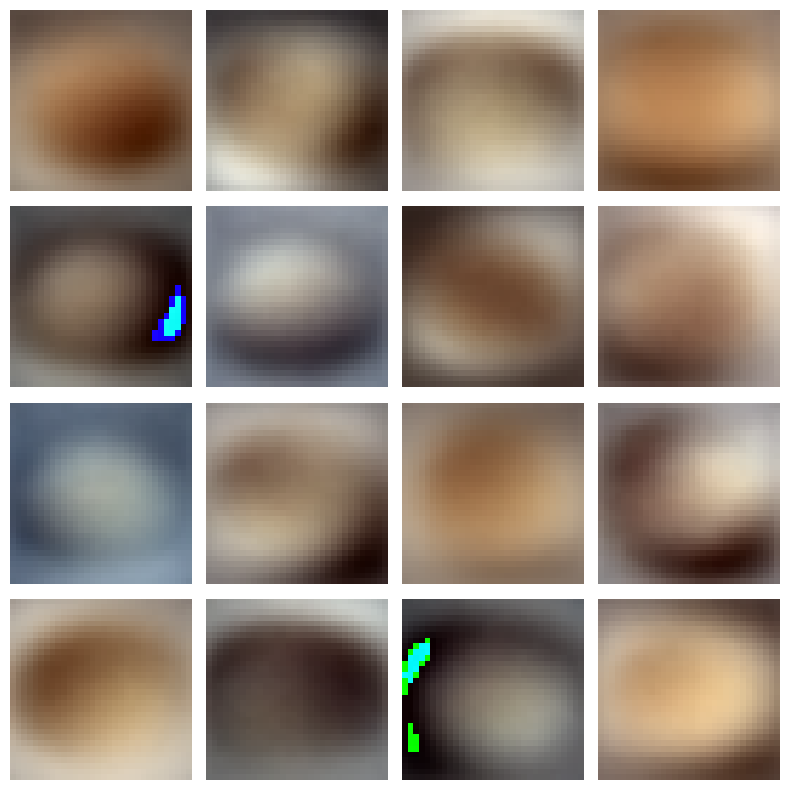

In [35]:

def GenDataWithPCAmultLabel(k, X_std, label, number_samples=1):
    k = k
    projection_matrix = eigenvectors[:, :k]
    
    X_pca = np.dot(X_std, projection_matrix)
    
    # Filter the PCA data by the specified label
    mask = (y_train == label)
    X_pca_label = X_pca[mask]
    
    # Initialize a matrix to store all new PCA vectors
    new_vec = np.zeros((number_samples, k))
    
    for j in range(number_samples):
        for i in range(k):
            # Generate values within the range observed in the original PCA-transformed data for the specified label
            new_val = np.random.normal(np.mean(X_pca_label[:, i]), np.std(X_pca_label[:, i]))
            new_vec[j, i] = new_val
            
    # Project back to the original space to get the reconstructed samples
    X_pca_reconstructed = np.dot(new_vec, projection_matrix.T)
    
    return new_vec, X_pca_reconstructed

# Function to visualize multiple images
def visualize_images(images, labels=None, title="Image", cmap='gray'):
    # Determine how many images and set up subplot dimensions
    num_images = images.shape[0]
    cols = int(np.ceil(np.sqrt(num_images)))
    rows = int(np.ceil(num_images / cols))
    
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 2, rows * 2))
    axes = axes.ravel()
    
    for i in range(num_images):
        image_matrix = images[i].reshape(32, 32, 3)
        ax = axes[i]
        ax.imshow(image_matrix.astype(np.uint8), cmap=cmap)
        if labels is not None:
            ax.set_title(f"{title}: {labels[i]}")
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()

# Flatten the images for PCA
X_flatten = X_train.reshape(X_train.shape[0], -1)

# Standardize the data
scaler = StandardScaler()
X_std_flatten = scaler.fit_transform(X_flatten)

# Example usage: Generate and visualize multiple PCA-reconstructed images
new_vec, X_pca_reconstructed = GenDataWithPCAmultLabel(10, X_std_flatten, 3, 16)

# Inverse transform and reshape the reconstructed images
X_pca_reconstructed = scaler.inverse_transform(X_pca_reconstructed)
X_pca_reconstructed = X_pca_reconstructed.reshape((16, 32, 32, 3))

# Visualize the images
visualize_images(X_pca_reconstructed)